In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
n = 28*28    #feature space dimension 
N_train = len(x_train)
N_test = len(x_test)

x_test = x_test.reshape((N_test, n))
x_train = x_train.reshape((N_train, n))

In [6]:
x_train_scaled = x_train/225
x_test_scaled = x_test/225

# Autoencoder

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [9]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [10]:
learning_rate = 0.01

In [11]:
actf = tf.nn.relu

In [12]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [13]:
initializer = tf.variance_scaling_initializer()

In [14]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]),dtype=tf.float32)

In [15]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [16]:
hid_layer1 = actf(tf.matmul(X,w1)+b1)
hid_layer2 = actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = actf(tf.matmul(hid_layer2,w3)+b3)
output_layer = actf(tf.matmul(hid_layer3,w4)+b4)

In [17]:
loss = tf.reduce_mean(tf.square(output_layer-X))

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [19]:
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [28]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = len(x_train_scaled)//batch_size
        
        for i in range(num_batches):
            
            X_batch = x_train_scaled[i*batch_size:(i+1)*batch_size][:]
            
            sess.run(train,feed_dict={X:X_batch})
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print('epoch: {} Loss: {}'.format(epoch,training_loss))
        
    saver.save(sess,'.example_stacked_autoencoder.ckpt')

epoch: 0 Loss: 0.07075691968202591
epoch: 1 Loss: 0.053610458970069885
epoch: 2 Loss: 0.04616754129528999
epoch: 3 Loss: 0.04156908392906189
epoch: 4 Loss: 0.039907533675432205


In [29]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'.example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:x_test_scaled[:num_test_images]})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from .example_stacked_autoencoder.ckpt


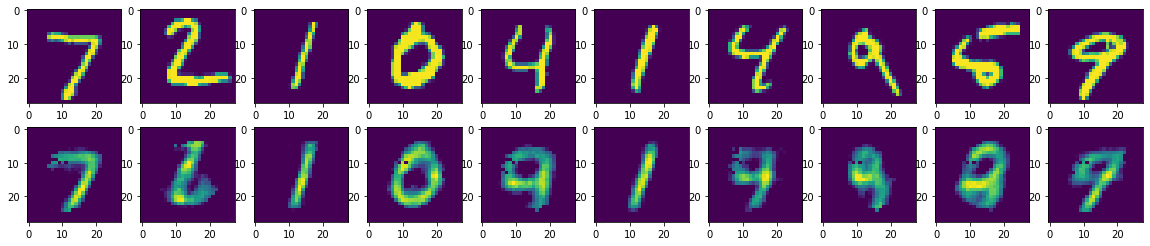

In [31]:
import matplotlib.pyplot as plt
import numpy as np
f, a = plt.subplots(2, 10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(x_test_scaled[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))